## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [66]:
your_name = "Marcus Coulter"
your_student_id = "47906596"

In [68]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# if you are using google colab with google drive, you could read files from google drive with the following codes
# from google.colab import drive
# drive.mount('/content/drive')

 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [71]:
# Load the dataset
df = pd.read_csv('car_sell.csv')

In [73]:
# Display the original DataFrame
print("Original DataFrame:")
print(df.head())

Original DataFrame:
   Unnamed: 0                      name    year  selling_price  km_driven  \
0           0             Maruti 800 AC  2007.0          60000      70000   
1           1  Maruti Wagon R LXI Minor  2007.0         135000      50000   
2           2      Hyundai Verna 1.6 SX  2012.0         600000     100000   
3           3    Datsun RediGO T Option  2017.0         250000      46000   
4           4     Honda Amaze VX i-DTEC  2014.0         450000     141000   

     fuel seller_type transmission         owner  
0  Petrol  Individual       Manual   First Owner  
1  Petrol  Individual       Manual   First Owner  
2  Diesel  Individual       Manual   First Owner  
3  Petrol  Individual       Manual   First Owner  
4  Diesel  Individual       Manual  Second Owner  


In [75]:
# Count the number of Null values in each column
print("\nNull values in each column (before):")
print(df.isnull().sum())


Null values in each column (before):
Unnamed: 0         0
name               0
year             310
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64


In [77]:
# Print the length of the data before removing missing data
print("\nLength of data before removing missing data:", len(df))


Length of data before removing missing data: 4340


In [79]:
# Remove records with missing 'year' or 'fuel' == 'none'
df = df.dropna(subset=['year'])
df = df[df['fuel'] != 'none']

In [81]:
# Count the number of Null values in each column after removing missing data
print("\nNull values in each column (after):")
print(df.isnull().sum())


Null values in each column (after):
Unnamed: 0       0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [83]:
# Print the length of the data after removing missing data
print("\nLength of data after removing missing data:", len(df))


Length of data after removing missing data: 3886


## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


In [86]:
# Load the cleaned data from Q1
df = pd.read_csv('car_sell.csv')

In [88]:
# Q2.1: Total number of unique values in each column
print("Q2.1: Total number of unique values in each column")
print("Unique names:", df['name'].nunique())
print("Unique seller types:", df['seller_type'].nunique())
print("Unique transmissions:", df['transmission'].nunique())
print("Unique owners:", df['owner'].nunique())

Q2.1: Total number of unique values in each column
Unique names: 1491
Unique seller types: 3
Unique transmissions: 2
Unique owners: 5


In [90]:
# Q2.2: Descriptive statistics for km_driven
print("\nQ2.2: Descriptive statistics for km_driven")
print(df['km_driven'].describe())



Q2.2: Descriptive statistics for km_driven
count      4340.000000
mean      66215.777419
std       46644.102194
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64


In [92]:
# Q2.3: Descriptive statistics for selling_price grouped by seller_type
print("\nQ2.3: Descriptive statistics for selling_price grouped by seller_type")
grouped = df.groupby('seller_type')['selling_price']
print(grouped.describe())


Q2.3: Descriptive statistics for selling_price grouped by seller_type
                   count           mean            std       min       25%  \
seller_type                                                                  
Dealer             994.0  721822.890342  859955.854810   22000.0  310000.0   
Individual        3244.0  424505.419236  427283.949336   20000.0  170000.0   
Trustmark Dealer   102.0  914950.980392  637361.320617  295000.0  625000.0   

                       50%       75%        max  
seller_type                                      
Dealer            495000.0  750000.0  8900000.0  
Individual        300000.0  540000.0  4800000.0  
Trustmark Dealer  750000.0  767500.0  2600000.0  


In [94]:
# Q2.4: Descriptive statistics for years sold by each owner type
print("\nQ2.4: Descriptive statistics for years sold by each owner type")
grouped = df.groupby('owner')['year']
print(grouped.describe())


Q2.4: Descriptive statistics for years sold by each owner type
                       count         mean       std     min      25%     50%  \
owner                                                                          
First Owner           2627.0  2014.435097  3.579033  1996.0  2012.00  2015.0   
Fourth & Above Owner    71.0  2007.225352  5.105172  1992.0  2004.00  2008.0   
Second Owner          1037.0  2010.982642  3.849696  1995.0  2009.00  2012.0   
Test Drive Car          14.0  2019.642857  0.633324  2018.0  2019.25  2020.0   
Third Owner            281.0  2009.508897  3.918923  1997.0  2007.00  2010.0   

                         75%     max  
owner                                 
First Owner           2017.0  2020.0  
Fourth & Above Owner  2010.0  2020.0  
Second Owner          2014.0  2019.0  
Test Drive Car        2020.0  2020.0  
Third Owner           2012.0  2019.0  


## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

In [97]:
import seaborn as sns

In [99]:
# Load the cleaned data from Q1
df = pd.read_csv('car_sell.csv')

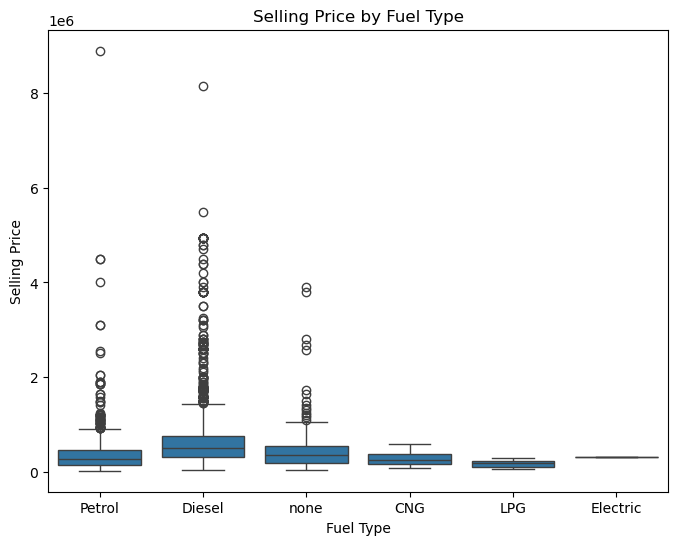

In [101]:
# 3.1: Boxplot of selling_price by fuel type
plt.figure(figsize=(8, 6))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

### 'Selling Price by Fuel Type'
The box plot indicates that petrol and diesel cars have the most variability in selling prices, likely due to their widespread use and availability in various models and conditions, in contrast, CNG, LPG and electric cars have more consistent selling prices, reflecting their specific market segments and growing but still limited adoption. This analysis suggests that fuel type significantly influences the variability and distribution of vehicle selling prices. 

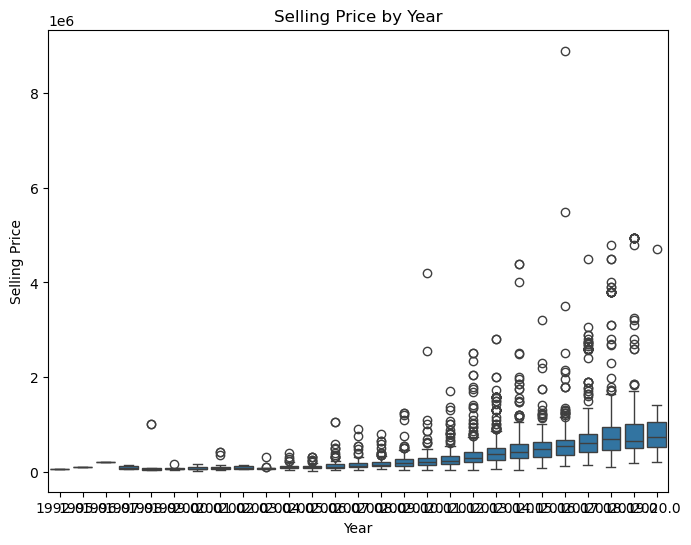

In [104]:
# 3.2: Boxplot of selling_price by year
plt.figure(figsize=(8, 6))
sns.boxplot(x='year', y='selling_price', data=df)
plt.title('Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

### Selling Price by Years
The boxplot reveals that newer cars tend to sell for higher prices compared to older cars. the spread of prices and the presnece of outliers are more pronounced for newer cars, indicating a wider range of selling prices and some exceptionally high priced cars. this trend suggests that the age of the car is a significant factor in determining its selling price, with newer cars being more valuable. 

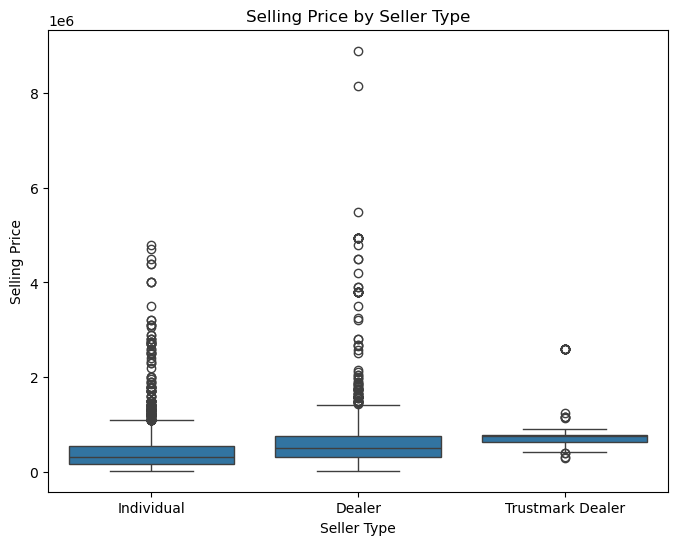

In [107]:
# 3.3: Boxplot of selling_price by seller_type
plt.figure(figsize=(8, 6))
sns.boxplot(x='seller_type', y='selling_price', data=df)
plt.title('Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.show()

### Selling Price by Seller Type
The boxplot reveals that cars sold by the trustmark dealers tend to have the higher median selling prices, followed by dealers and then individual sellers. trustmark dealers also show a more consistent price range, while individual sellers and dealers exhibit more variability in their selling prices. this trend suggests that the type of seller is a significant factor in determining the selling price of a car, with trustmark dealers generally commanding higher prices. 

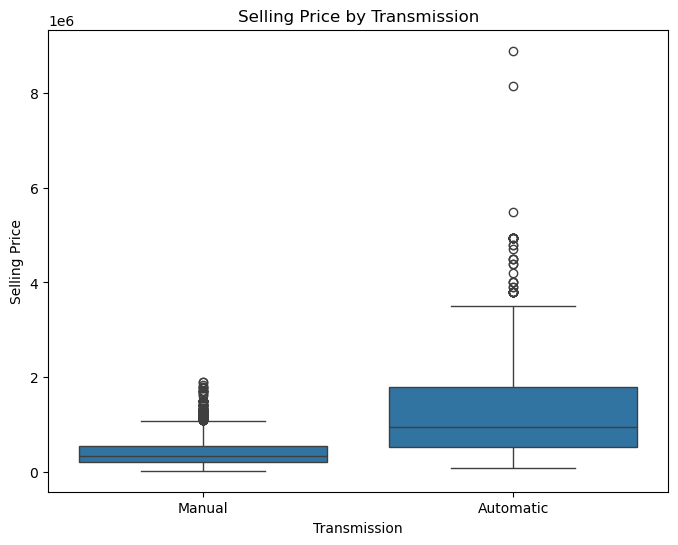

In [110]:
# 3.4: Boxplot of selling_price by transmission
plt.figure(figsize=(8, 6))
sns.boxplot(x='transmission', y='selling_price', data=df)
plt.title('Selling Price by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()

### Selling Price by Transmission Type
From the Provided boxplot, we can conclude that transmission type impracts vehicle selling prices, with automatic cars generally commanding higher prices than manual ones. however, to draw comprehensive conclusions about the correlations between fuel type, year, seller type, owner type, and selling price, additional plots are necessary 

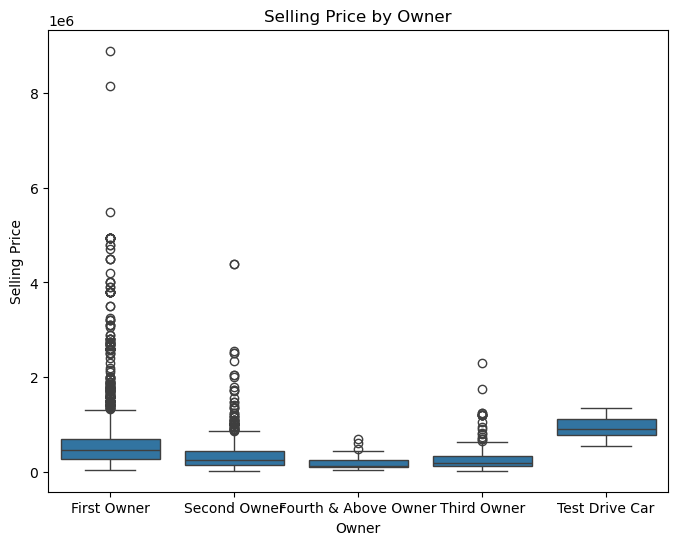

In [113]:
# 3.5: Boxplot of selling_price by owner
plt.figure(figsize=(8, 6))
sns.boxplot(x='owner', y='selling_price', data=df)
plt.title('Selling Price by Owner')
plt.xlabel('Owner')
plt.ylabel('Selling Price')
plt.show()

### Selling Price of Owner
From the boxplot analysis, it is evident that the number of pervious owners significantly impacts the selling price of cars. First car owners tend to sell at higher prices compared to cars with multiple previous owners. test drive cars also command relatively high prices likely due to their maintained condition despite being used for test drives. 

## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [117]:
# Load the cleaned data from Q1
df = pd.read_csv('car_sell.csv')

In [119]:
# Define the rules for outliers
rules = [
    df['owner'].isin(['First', 'Second', 'Third']),
    df['fuel'].isin(['Diesel', 'Petrol']),
    df['seller_type'].isin(['Dealer', 'Individual'])
]

In [121]:
# Create a mask to identify outliers
outlier_mask = ~pd.concat(rules, axis=1).all(axis=1)

In [123]:
# Remove outliers from the dataframe
df = df[~outlier_mask]

In [125]:
# Print the length of the data after removing outliers
print("Length of data after removing outliers:", len(df))


Length of data after removing outliers: 0


In [127]:
# Save the updated dataframe to a new csv file
df.to_csv('car_sell_cleaned.csv', index=False)